# NixtlaTS

> TimeGPT, developed by Nixtla, is a generative pre-trained transformer model specialized in prediction tasks. TimeGPT was trained on the largest collection of data in history – over 100 billion rows of financial, weather, energy, and web data – and democratizes the power of time-series analysis. This tool is capable of discerning patterns and predicting future data points in a matter of seconds.

## Install

```bash
pip install nixtlats
```

## How to use

Just import the library, set your credentials, and start forecasting in two lines of code!

In [1]:
import sys
sys.path


['/Users/lilypad/Documents/Code/timegpt',
 '/Users/lilypad/.pyenv/versions/3.10.0/lib/python310.zip',
 '/Users/lilypad/.pyenv/versions/3.10.0/lib/python3.10',
 '/Users/lilypad/.pyenv/versions/3.10.0/lib/python3.10/lib-dynload',
 '',
 '/Users/lilypad/.pyenv/versions/3.10.0/lib/python3.10/site-packages']

In [2]:
#| hide
import os

import pandas as pd
from statsforecast import StatsForecast as sf
from dotenv import load_dotenv

print(os.environ)
print(os.getcwd())
load_dotenv()


/Users/lilypad/.pyenv/versions/3.10.0/lib/python3.10/site-packages/statsforecast/core.py:25: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


environ({'COMMAND_MODE': 'unix2003', 'CONDA_DEFAULT_ENV': 'base', 'CONDA_EXE': '/Users/lilypad/miniconda3/bin/conda', 'CONDA_PREFIX': '/Users/lilypad/miniconda3', 'CONDA_PROMPT_MODIFIER': '(base) ', 'CONDA_PYTHON_EXE': '/Users/lilypad/miniconda3/bin/python', 'CONDA_SHLVL': '1', 'HOME': '/Users/lilypad', 'HOMEBREW_CELLAR': '/opt/homebrew/Cellar', 'HOMEBREW_PREFIX': '/opt/homebrew', 'HOMEBREW_REPOSITORY': '/opt/homebrew', 'INFOPATH': '/opt/homebrew/share/info:', 'LOGNAME': 'lilypad', 'MANPATH': '/opt/homebrew/share/man::', 'MallocNanoZone': '0', 'OLDPWD': '/', 'ORIGINAL_XDG_CURRENT_DESKTOP': 'undefined', 'PATH': '/Users/lilypad/.pyenv/versions/3.10.0/bin:/Users/lilypad/miniconda3/bin:/Users/lilypad/miniconda3/condabin:/Users/lilypad/.pyenv/shims:/opt/homebrew/bin:/opt/homebrew/sbin:/usr/local/bin:/System/Cryptexes/App/usr/bin:/usr/bin:/bin:/usr/sbin:/sbin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/usr/local/bin:/var/run/com.apple.security.cryptexd/codex.system/bootstrap/

True

In [8]:
# load local csv file
df_init= pd.read_csv('/Users/lilypad/Documents/Code/timegpt/20200101_20230919_daily_eth_usd.csv')
# inspect the data
df_init.head()

,date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330
1,2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256
2,2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358
3,2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515
4,2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353


In [9]:
# check if df is sorted by date
sorted_df = df_init.sort_values(by='date', ascending=True)
if df_init.equals(sorted_df):
    print("The DataFrame is sorted by date.")
else:
    print("The DataFrame is not sorted by date.")

The DataFrame is sorted by date.


In [10]:
# Calculate the daily price change and create a new column
df_init['Price Delta'] = df_init['Close'].diff()
# Calculate the daily percentage change and create a new column
df_init['Daily_Percentage_Change'] = df_init['Close'].pct_change() * 100

# Display the DataFrame with the new column
df_init.head()

,date,Open,High,Low,Close,Adj Close,Volume,Price Delta,Daily_Percentage_Change
0,2020-01-01,129.630661,132.835358,129.198288,130.802002,130.802002,7935230330,NaN,NaN
1,2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256,-3.391823,-2.593097
2,2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358,6.761528,5.306898
3,2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515,0.897659,0.669038
4,2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353,1.207413,0.893920


In [11]:
# drop the rows with missing values
df_init.dropna(subset=['Price Delta','Daily_Percentage_Change'], inplace=True)

In [12]:
df= df_init
pred_target= 'Adj Close'

df['date'] = pd.to_datetime(df['date'])

df.rename(columns={'date':'ds', pred_target: 'y'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1357 entries, 1 to 1357
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ds                       1357 non-null   datetime64[ns]
 1   Open                     1357 non-null   float64       
 2   High                     1357 non-null   float64       
 3   Low                      1357 non-null   float64       
 4   Close                    1357 non-null   float64       
 5   y                        1357 non-null   float64       
 6   Volume                   1357 non-null   int64         
 7   Price Delta              1357 non-null   float64       
 8   Daily_Percentage_Change  1357 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 106.0 KB


In [13]:
# need to add a unique_id column to the df, so that the model can be trained on multiple time series and exogenous variables
df['unique_id']= 'ETH'


![dd](./train_test_for_timeseries.jpeg)

In [16]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from nixtlats import TimeGPT

# Load the TimeGPT token from the environment variable
print(os.environ['TIMEGPT_TOKEN'])
timegpt = TimeGPT(token=os.environ['TIMEGPT_TOKEN'])

# Define lists of values to try

# The frequency of the data represented as a string. 'D' for daily, 'M' for monthly, 'H' for hourly, and 'W' for weekly frequencies are available , ther eare more.
# The freq can be infered from the data autoamtically, but it might be unstgable, it is better to specify it.
freq_values = ['D']  # Example values for freq
finetune_steps_values = [10, 50, 100]  # Example values for finetune_steps
pred_horizon_values = [7, 14]  # Example values for pred_horizon

# Initialize lists to store the best metrics and parameters
best_mae, best_mse, best_rmse, best_mape, best_da = float('inf'), float('inf'), float('inf'), float('inf'), float('inf')
best_params = {}

# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Directional Accuracy (DA)
def calculate_da(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sum(np.sign(y_true_diff) == np.sign(y_pred_diff))
    total_directions = len(y_true_diff)
    return correct_direction / total_directions * 100

# TODO: find proper metrics to measure the confidence interval prediction performance
# Coverage Rate: Measures the percentage of actual values within the predicted confidence intervals.


# Function to calculate metrics
def calculate_metrics(df):
    mae = mean_absolute_error(df['y'], df['TimeGPT'])
    mse = mean_squared_error(df['y'], df['TimeGPT'])
    rmse = sqrt(mse)
    mape = calculate_mape(df['y'], df['TimeGPT'])
    da = calculate_da(df['y'], df['TimeGPT'])
    return mae, mse, rmse, mape, da

# Time Series Cross-Validation
n_splits = 5  # Number of splits for cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)

for freq in freq_values:
    for finetune_steps in finetune_steps_values:
        for pred_horizon in pred_horizon_values:
            # Initialize lists to store performance metrics for each fold
            mae_scores, mse_scores, rmse_scores, mape_scores, da_scores = [], [], [], [], []

            for train_index, test_index in tscv.split(df):
                train_data = df.iloc[train_index]
                test_data = df.iloc[test_index]
                print('current fold'+ str(train_index[0]) + 'to' + str(train_index[-1]))
          
                print('------------------training head and tail----------------')
                print(train_data.head(1))
                print(train_data.tail(1))
                # Adjust parameters for the timegpt.forecast function
                fcst_df = timegpt.forecast(train_data, h=pred_horizon, freq=freq, level=[80, 90], finetune_steps=finetune_steps, add_history=True)
                fcst_df['ds'] = pd.to_datetime(fcst_df['ds'])
                print('----------------fcst_df head and tail---------------')
                print(fcst_df.shape)
                print(fcst_df.head(1))
                print(fcst_df.tail(1))
                
                print('----------------test_data head and tail--------------')
                print(test_data.shape)
                print(test_data.head(1))
                print(test_data.tail(1))
                # Merge test_data and forecasted data on 'ds'
                merged_df = pd.merge(test_data, fcst_df, on='ds', how='inner')

                print("----------------merged df head and tail--------------")
                print(merged_df.shape)
                print(merged_df.columns)
                print(merged_df.head(1))
                print(merged_df.tail(1))
                
                # TODO: Plot the forecasted data

         
                # Calculate and append metrics
                mae, mse, rmse, mape, da = calculate_metrics(merged_df)
                mae_scores.append(mae)
                mse_scores.append(mse)
                rmse_scores.append(rmse)
                mape_scores.append(mape)
                da_scores.append(da)

            # Calculate average metrics over folds
            avg_mae = np.mean(mae_scores)
            avg_mse = np.mean(mse_scores)
            avg_rmse = np.mean(rmse_scores)
            avg_mape = np.mean(mape_scores)
            avg_da = np.mean(da_scores)

            # Check if this combination of parameters gives better metrics
            if avg_mae < best_mae:
                best_mae = avg_mae
                best_mse = avg_mse
                best_rmse = avg_rmse
                best_mape = avg_mape
                best_da = avg_da
                best_params = {
                    'freq': freq,
                    'finetune_steps': finetune_steps,
                    'pred_horizon': pred_horizon
                }

# Print the best metrics and parameters
print(f'Best MAE: {best_mae}')
print(f'Best MSE: {best_mse}')
print(f'Best RMSE: {best_rmse}')
print(f'Best MAPE: {best_mape:.2f}%')
print(f'Best DA: {best_da:.2f}%')
print('Best Parameters:')
print(best_params)


INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


533JADuCGuSZb1NnwXcCrZdyZ1YrGtRLr6YYuYW8redP6mftjNJMC9yDcShEpXVXq7XnN9UkpAoPpM9kCzIGBU1ILvzplC1MsUUNbprafJR25KvW86iG4ASZwG6bZ0g1QZVq0pHDVCsa756vRuuvEcOeqYUWjKNECmASTCuaSTy3c1IqlGhvnleegPP7GKGsMUZ9PsnMxw9ODPIi4F1FLe5xL6fMKq3n9pCfZA8BC6bYWV4koCRbJjTRpCIOO8ap
current fold0to226
------------------training head and tail----------------
          ds        Open        High        Low       Close           y  \
1 2020-01-02  130.820038  130.820038  126.95491  127.410179  127.410179   

       Volume  Price Delta  Daily_Percentage_Change unique_id  
1  8032709256    -3.391823                -2.593097       ETH  
            ds        Open        High         Low       Close           y  \
227 2020-08-15  437.562988  441.754608  429.874603  433.354919  433.354919   

          Volume  Price Delta  Daily_Percentage_Change unique_id  
227  12416067894    -4.042908                -0.924309       ETH  


INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(203, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-02  182.074631     150.291202     141.281042   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     213.858059      222.86822  
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2020-08-22  461.670959     425.168533     412.569599   

   TimeGPT-hi-80  TimeGPT-hi-90  
6     498.173386      510.77232  
----------------test_data head and tail--------------
(226, 10)
            ds        Open        High         Low       Close           y  \
228 2020-08-16  433.350586  436.265839  415.086243  433.786621  433.786621   

          Volume  Price Delta  Daily_Percentage_Change unique_id  
228  12168816874     0.431702                 0.099618       ETH  
            ds         Open         High          Low        Close  \
453 2021-03-29  1691.263184  1837.187988  1683.716553  1819.684937   

               y       Volume  P

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(427, 7)
  unique_id         ds    TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-04  191.74147      83.898755      53.326844   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     299.584186     330.156097  
  unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2021-04-05  1794.092285    1709.817363    1665.470496   

   TimeGPT-hi-80  TimeGPT-hi-90  
6    1878.367207    1922.714075  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
454 2021-03-30  1819.466309  1860.974731  1793.922363  1846.033691   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
454  1846.033691  22512781703    26.348755                 1.447984       ETH  
            ds         Open        High          Low        Close  \
679 2021-11-10  4733.362793  4859.50293  4485.093262  4636.174316   

               y       V

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(658, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-01-30  173.821213     -69.324921    -138.253472   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     416.967347     485.895897  
  unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2021-11-17  4781.294922    4478.577332     4333.68515   

   TimeGPT-hi-80  TimeGPT-hi-90  
6    5084.012512    5228.904694  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
680 2021-11-11  4635.453613  4778.059082  4580.990234  4730.384277   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
680  4730.384277  17933201129    94.209961                 2.032063       ETH  
            ds         Open         High          Low        Close  \
905 2022-06-24  1143.204712  1238.616943  1134.514038  1226.844727   

               y    

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(882, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-01  180.087265    -106.442448     -187.66964   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     466.616978      547.84417  
  unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2022-07-01  1176.664551     825.151172     694.476941   

   TimeGPT-hi-80  TimeGPT-hi-90  
6     1528.17793    1658.852161  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
906 2022-06-25  1226.724731  1246.394287  1184.562012  1243.446899   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
906  1243.446899  12481946184    16.602173                 1.353242       ETH  
             ds         Open         High          Low        Close  \
1131 2023-02-05  1667.166504  1671.770264  1616.391846  1631.645874   

                y 

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(1106, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-03  188.648987     -90.680373    -169.866365   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     467.978346     547.164339  
  unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2023-02-12  1662.564209    1351.863477    1259.148413   

   TimeGPT-hi-80  TimeGPT-hi-90  
6    1973.264941    2065.980005  
----------------test_data head and tail--------------
(226, 10)
             ds         Open         High          Low       Close  \
1132 2023-02-06  1631.645264  1653.715454  1611.319092  1616.24707   

               y      Volume  Price Delta  Daily_Percentage_Change unique_id  
1132  1616.24707  6919871886   -15.398804                -0.943759       ETH  
             ds         Open         High          Low        Close  \
1357 2023-09-19  1637.312012  1659.531738  1628.413208  1643.544678   

                y  

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(210, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-02  182.074631     150.291202     141.281042   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     213.858059      222.86822  
   unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2020-08-29  485.712524     449.210098     436.611164   

    TimeGPT-hi-80  TimeGPT-hi-90  
13     522.214951     534.813885  
----------------test_data head and tail--------------
(226, 10)
            ds        Open        High         Low       Close           y  \
228 2020-08-16  433.350586  436.265839  415.086243  433.786621  433.786621   

          Volume  Price Delta  Daily_Percentage_Change unique_id  
228  12168816874     0.431702                 0.099618       ETH  
            ds         Open         High          Low        Close  \
453 2021-03-29  1691.263184  1837.187988  1683.716553  1819.684937   

               y       Volum

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(434, 7)
  unique_id         ds    TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-04  191.74147      83.898755      53.326844   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     299.584186     330.156097  
   unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2021-04-12  1830.856323    1746.581401    1702.234534   

    TimeGPT-hi-80  TimeGPT-hi-90  
13    1915.131245    1959.478113  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
454 2021-03-30  1819.466309  1860.974731  1793.922363  1846.033691   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
454  1846.033691  22512781703    26.348755                 1.447984       ETH  
            ds         Open        High          Low        Close  \
679 2021-11-10  4733.362793  4859.50293  4485.093262  4636.174316   

               y    

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(665, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-01-30  173.821213     -69.324921    -138.253472   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     416.967347     485.895897  
   unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2021-11-24  4906.509766    4603.792175    4458.899994   

    TimeGPT-hi-80  TimeGPT-hi-90  
13    5209.227356    5354.119537  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
680 2021-11-11  4635.453613  4778.059082  4580.990234  4730.384277   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
680  4730.384277  17933201129    94.209961                 2.032063       ETH  
            ds         Open         High          Low        Close  \
905 2022-06-24  1143.204712  1238.616943  1134.514038  1226.844727   

               y

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(889, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-01  180.087265    -106.442448     -187.66964   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     466.616978      547.84417  
   unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2022-07-08  1186.483765     834.970386     704.296155   

    TimeGPT-hi-80  TimeGPT-hi-90  
13    1537.997144    1668.671375  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
906 2022-06-25  1226.724731  1246.394287  1184.562012  1243.446899   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
906  1243.446899  12481946184    16.602173                 1.353242       ETH  
             ds         Open         High          Low        Close  \
1131 2023-02-05  1667.166504  1671.770264  1616.391846  1631.645874   

              

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(1113, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-03  188.648987     -90.680373    -169.866365   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     467.978346     547.164339  
   unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2023-02-19  1669.712402     1359.01167    1266.296606   

    TimeGPT-hi-80  TimeGPT-hi-90  
13    1980.413135    2073.128198  
----------------test_data head and tail--------------
(226, 10)
             ds         Open         High          Low       Close  \
1132 2023-02-06  1631.645264  1653.715454  1611.319092  1616.24707   

               y      Volume  Price Delta  Daily_Percentage_Change unique_id  
1132  1616.24707  6919871886   -15.398804                -0.943759       ETH  
             ds         Open         High          Low        Close  \
1357 2023-09-19  1637.312012  1659.531738  1628.413208  1643.544678   

               

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(203, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-02  182.074631     150.291202     141.281042   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     213.858059      222.86822  
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2020-08-22  475.386597     438.884171     426.285236   

   TimeGPT-hi-80  TimeGPT-hi-90  
6     511.889023     524.487957  
----------------test_data head and tail--------------
(226, 10)
            ds        Open        High         Low       Close           y  \
228 2020-08-16  433.350586  436.265839  415.086243  433.786621  433.786621   

          Volume  Price Delta  Daily_Percentage_Change unique_id  
228  12168816874     0.431702                 0.099618       ETH  
            ds         Open         High          Low        Close  \
453 2021-03-29  1691.263184  1837.187988  1683.716553  1819.684937   

               y       Volume  P

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(427, 7)
  unique_id         ds    TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-04  191.74147      83.898755      53.326844   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     299.584186     330.156097  
  unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2021-04-05  1823.357666    1739.082744    1694.735876   

   TimeGPT-hi-80  TimeGPT-hi-90  
6    1907.632588    1951.979456  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
454 2021-03-30  1819.466309  1860.974731  1793.922363  1846.033691   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
454  1846.033691  22512781703    26.348755                 1.447984       ETH  
            ds         Open        High          Low        Close  \
679 2021-11-10  4733.362793  4859.50293  4485.093262  4636.174316   

               y       V

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(658, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-01-30  173.821213     -69.324921    -138.253472   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     416.967347     485.895897  
  unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2021-11-17  4824.104004    4521.386414    4376.494232   

   TimeGPT-hi-80  TimeGPT-hi-90  
6    5126.821594    5271.713776  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
680 2021-11-11  4635.453613  4778.059082  4580.990234  4730.384277   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
680  4730.384277  17933201129    94.209961                 2.032063       ETH  
            ds         Open         High          Low        Close  \
905 2022-06-24  1143.204712  1238.616943  1134.514038  1226.844727   

               y    

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(882, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-01  180.087265    -106.442448     -187.66964   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     466.616978      547.84417  
  unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2022-07-01  1129.275391     777.762012     647.087781   

   TimeGPT-hi-80  TimeGPT-hi-90  
6     1480.78877       1611.463  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
906 2022-06-25  1226.724731  1246.394287  1184.562012  1243.446899   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
906  1243.446899  12481946184    16.602173                 1.353242       ETH  
             ds         Open         High          Low        Close  \
1131 2023-02-05  1667.166504  1671.770264  1616.391846  1631.645874   

                y 

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(1106, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-03  188.648987     -90.680373    -169.866365   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     467.978346     547.164339  
  unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2023-02-12  1693.741089    1383.040356    1290.325293   

   TimeGPT-hi-80  TimeGPT-hi-90  
6    2004.441821    2097.156885  
----------------test_data head and tail--------------
(226, 10)
             ds         Open         High          Low       Close  \
1132 2023-02-06  1631.645264  1653.715454  1611.319092  1616.24707   

               y      Volume  Price Delta  Daily_Percentage_Change unique_id  
1132  1616.24707  6919871886   -15.398804                -0.943759       ETH  
             ds         Open         High          Low        Close  \
1357 2023-09-19  1637.312012  1659.531738  1628.413208  1643.544678   

                y  

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(210, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-02  182.074631     150.291202     141.281042   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     213.858059      222.86822  
   unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2020-08-29  511.685913     475.183487     462.584553   

    TimeGPT-hi-80  TimeGPT-hi-90  
13     548.188339     560.787273  
----------------test_data head and tail--------------
(226, 10)
            ds        Open        High         Low       Close           y  \
228 2020-08-16  433.350586  436.265839  415.086243  433.786621  433.786621   

          Volume  Price Delta  Daily_Percentage_Change unique_id  
228  12168816874     0.431702                 0.099618       ETH  
            ds         Open         High          Low        Close  \
453 2021-03-29  1691.263184  1837.187988  1683.716553  1819.684937   

               y       Volum

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(434, 7)
  unique_id         ds    TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-04  191.74147      83.898755      53.326844   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     299.584186     330.156097  
   unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2021-04-12  1883.71167    1799.436748     1755.08988   

    TimeGPT-hi-80  TimeGPT-hi-90  
13    1967.986592    2012.333459  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
454 2021-03-30  1819.466309  1860.974731  1793.922363  1846.033691   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
454  1846.033691  22512781703    26.348755                 1.447984       ETH  
            ds         Open        High          Low        Close  \
679 2021-11-10  4733.362793  4859.50293  4485.093262  4636.174316   

               y      

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(665, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-01-30  173.821213     -69.324921    -138.253472   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     416.967347     485.895897  
   unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2021-11-24  4988.949219    4686.231628    4541.339447   

    TimeGPT-hi-80  TimeGPT-hi-90  
13    5291.666809     5436.55899  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
680 2021-11-11  4635.453613  4778.059082  4580.990234  4730.384277   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
680  4730.384277  17933201129    94.209961                 2.032063       ETH  
            ds         Open         High          Low        Close  \
905 2022-06-24  1143.204712  1238.616943  1134.514038  1226.844727   

               y

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(889, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-01  180.087265    -106.442448     -187.66964   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     466.616978      547.84417  
   unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2022-07-08  1067.376709      715.86333     585.189099   

    TimeGPT-hi-80  TimeGPT-hi-90  
13    1418.890088    1549.564319  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
906 2022-06-25  1226.724731  1246.394287  1184.562012  1243.446899   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
906  1243.446899  12481946184    16.602173                 1.353242       ETH  
             ds         Open         High          Low        Close  \
1131 2023-02-05  1667.166504  1671.770264  1616.391846  1631.645874   

              

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(1113, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-03  188.648987     -90.680373    -169.866365   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     467.978346     547.164339  
   unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2023-02-19  1722.861328    1412.160596    1319.445532   

    TimeGPT-hi-80  TimeGPT-hi-90  
13    2033.562061    2126.277124  
----------------test_data head and tail--------------
(226, 10)
             ds         Open         High          Low       Close  \
1132 2023-02-06  1631.645264  1653.715454  1611.319092  1616.24707   

               y      Volume  Price Delta  Daily_Percentage_Change unique_id  
1132  1616.24707  6919871886   -15.398804                -0.943759       ETH  
             ds         Open         High          Low        Close  \
1357 2023-09-19  1637.312012  1659.531738  1628.413208  1643.544678   

               

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(203, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-02  182.074631     150.291202     141.281042   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     213.858059      222.86822  
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2020-08-22  455.963898     419.461472     406.862537   

   TimeGPT-hi-80  TimeGPT-hi-90  
6     492.466324     505.065258  
----------------test_data head and tail--------------
(226, 10)
            ds        Open        High         Low       Close           y  \
228 2020-08-16  433.350586  436.265839  415.086243  433.786621  433.786621   

          Volume  Price Delta  Daily_Percentage_Change unique_id  
228  12168816874     0.431702                 0.099618       ETH  
            ds         Open         High          Low        Close  \
453 2021-03-29  1691.263184  1837.187988  1683.716553  1819.684937   

               y       Volume  P

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(427, 7)
  unique_id         ds    TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-04  191.74147      83.898755      53.326844   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     299.584186     330.156097  
  unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2021-04-05  1803.452881    1719.177959    1674.831091   

   TimeGPT-hi-80  TimeGPT-hi-90  
6    1887.727803     1932.07467  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
454 2021-03-30  1819.466309  1860.974731  1793.922363  1846.033691   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
454  1846.033691  22512781703    26.348755                 1.447984       ETH  
            ds         Open        High          Low        Close  \
679 2021-11-10  4733.362793  4859.50293  4485.093262  4636.174316   

               y       V

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(658, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-01-30  173.821213     -69.324921    -138.253472   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     416.967347     485.895897  
  unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2021-11-17  4753.721191    4451.003601     4306.11142   

   TimeGPT-hi-80  TimeGPT-hi-90  
6    5056.438782    5201.330963  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
680 2021-11-11  4635.453613  4778.059082  4580.990234  4730.384277   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
680  4730.384277  17933201129    94.209961                 2.032063       ETH  
            ds         Open         High          Low        Close  \
905 2022-06-24  1143.204712  1238.616943  1134.514038  1226.844727   

               y    

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(882, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-01  180.087265    -106.442448     -187.66964   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     466.616978      547.84417  
  unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2022-07-01  1130.147461     778.634082     647.959851   

   TimeGPT-hi-80  TimeGPT-hi-90  
6     1481.66084    1612.335071  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
906 2022-06-25  1226.724731  1246.394287  1184.562012  1243.446899   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
906  1243.446899  12481946184    16.602173                 1.353242       ETH  
             ds         Open         High          Low        Close  \
1131 2023-02-05  1667.166504  1671.770264  1616.391846  1631.645874   

                y 

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(1106, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-03  188.648987     -90.680373    -169.866365   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     467.978346     547.164339  
  unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
6       ETH 2023-02-12  1750.664795    1439.964062    1347.248999   

   TimeGPT-hi-80  TimeGPT-hi-90  
6    2061.365527    2154.080591  
----------------test_data head and tail--------------
(226, 10)
             ds         Open         High          Low       Close  \
1132 2023-02-06  1631.645264  1653.715454  1611.319092  1616.24707   

               y      Volume  Price Delta  Daily_Percentage_Change unique_id  
1132  1616.24707  6919871886   -15.398804                -0.943759       ETH  
             ds         Open         High          Low        Close  \
1357 2023-09-19  1637.312012  1659.531738  1628.413208  1643.544678   

                y  

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(210, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-02  182.074631     150.291202     141.281042   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     213.858059      222.86822  
   unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2020-08-29  471.686462     435.184036     422.585102   

    TimeGPT-hi-80  TimeGPT-hi-90  
13     508.188889     520.787823  
----------------test_data head and tail--------------
(226, 10)
            ds        Open        High         Low       Close           y  \
228 2020-08-16  433.350586  436.265839  415.086243  433.786621  433.786621   

          Volume  Price Delta  Daily_Percentage_Change unique_id  
228  12168816874     0.431702                 0.099618       ETH  
            ds         Open         High          Low        Close  \
453 2021-03-29  1691.263184  1837.187988  1683.716553  1819.684937   

               y       Volum

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(434, 7)
  unique_id         ds    TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-04  191.74147      83.898755      53.326844   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     299.584186     330.156097  
   unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2021-04-12  1865.758667    1781.483745    1737.136877   

    TimeGPT-hi-80  TimeGPT-hi-90  
13    1950.033589    1994.380457  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
454 2021-03-30  1819.466309  1860.974731  1793.922363  1846.033691   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
454  1846.033691  22512781703    26.348755                 1.447984       ETH  
            ds         Open        High          Low        Close  \
679 2021-11-10  4733.362793  4859.50293  4485.093262  4636.174316   

               y    

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(665, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-01-30  173.821213     -69.324921    -138.253472   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     416.967347     485.895897  
   unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2021-11-24  4846.329102    4543.611511     4398.71933   

    TimeGPT-hi-80  TimeGPT-hi-90  
13    5149.046692    5293.938873  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
680 2021-11-11  4635.453613  4778.059082  4580.990234  4730.384277   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
680  4730.384277  17933201129    94.209961                 2.032063       ETH  
            ds         Open         High          Low        Close  \
905 2022-06-24  1143.204712  1238.616943  1134.514038  1226.844727   

               y

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...
INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...


----------------fcst_df head and tail---------------
(889, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-01  180.087265    -106.442448     -187.66964   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     466.616978      547.84417  
   unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2022-07-08  1018.286987     666.773608     536.099377   

    TimeGPT-hi-80  TimeGPT-hi-90  
13    1369.800366    1500.474597  
----------------test_data head and tail--------------
(226, 10)
            ds         Open         High          Low        Close  \
906 2022-06-25  1226.724731  1246.394287  1184.562012  1243.446899   

               y       Volume  Price Delta  Daily_Percentage_Change unique_id  
906  1243.446899  12481946184    16.602173                 1.353242       ETH  
             ds         Open         High          Low        Close  \
1131 2023-02-05  1667.166504  1671.770264  1616.391846  1631.645874   

              

INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...


----------------fcst_df head and tail---------------
(1113, 7)
  unique_id         ds     TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0       ETH 2020-02-03  188.648987     -90.680373    -169.866365   

   TimeGPT-hi-80  TimeGPT-hi-90  
0     467.978346     547.164339  
   unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
13       ETH 2023-02-19  1845.056885    1534.356152    1441.641089   

    TimeGPT-hi-80  TimeGPT-hi-90  
13    2155.757617    2248.472681  
----------------test_data head and tail--------------
(226, 10)
             ds         Open         High          Low       Close  \
1132 2023-02-06  1631.645264  1653.715454  1611.319092  1616.24707   

               y      Volume  Price Delta  Daily_Percentage_Change unique_id  
1132  1616.24707  6919871886   -15.398804                -0.943759       ETH  
             ds         Open         High          Low        Close  \
1357 2023-09-19  1637.312012  1659.531738  1628.413208  1643.544678   

               

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...


Index(['unique_id', 'ds', 'TimeGPT', 'TimeGPT-lo-80', 'TimeGPT-lo-90',
       'TimeGPT-lo-99.5', 'TimeGPT-hi-80', 'TimeGPT-hi-90', 'TimeGPT-hi-99.5'],
      dtype='object')
Average MAE: 134.14352839933466
Average MSE: 47330.00113967949
Average RMSE: 217.55459346950016
Average MAPE: 7.93%
Average DA: 46.49%


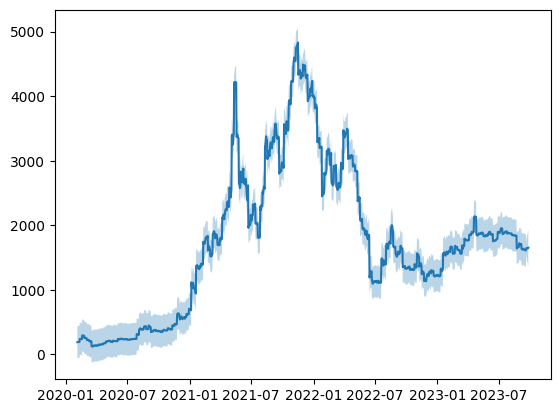

In [17]:
# Use the best parameters to make predictions
best_freq = best_params['freq']
best_finetune_steps = best_params['finetune_steps']
best_pred_horizon = best_params['pred_horizon']

level= [80, 90, 99.5]

# Make predictions with the best parameters
fcst_df_best = timegpt.forecast(df, h=best_pred_horizon, freq=best_freq, level=level, finetune_steps=best_finetune_steps, add_history=True)
fcst_df_best['ds'] = pd.to_datetime(fcst_df_best['ds'])
print(fcst_df_best.columns)
# Print or use fcst_df_best as needed
merged_df = pd.merge(df, fcst_df, on='ds', how='inner')
mae, mse, rmse, mape, da = calculate_metrics(merged_df)
print(f'Average MAE: {mae}')
print(f'Average MSE: {mse}')
print(f'Average RMSE: {rmse}')
print(f'Average MAPE: {mape:.2f}%')
print(f'Average DA: {da:.2f}%')

import matplotlib.pyplot as plt
plt.plot(fcst_df_best['ds'], fcst_df_best['TimeGPT'])
plt.fill_between(fcst_df_best['ds'], fcst_df_best['TimeGPT-lo-80'], fcst_df_best['TimeGPT-hi-80'], alpha=0.3)

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...
INFO:nixtlats.timegpt:Calling Historical Forecast Endpoint...


   unique_id         ds      TimeGPT  TimeGPT-lo-80  TimeGPT-lo-90  \
0        ETH 2020-02-05   190.613998     -57.140027    -127.374851   
1        ETH 2020-02-06   190.573578     -57.180448    -127.415272   
2        ETH 2020-02-07   190.795776     -56.958249    -127.193073   
3        ETH 2020-02-08   191.909668     -55.844358    -126.079182   
4        ETH 2020-02-09   192.826385     -54.927640    -125.162464   
..       ...        ...          ...            ...            ...   
2        ETH 2023-09-22  1638.647598    1456.019974    1357.915335   
3        ETH 2023-09-23  1638.278778    1423.508246    1371.369971   
4        ETH 2023-09-24  1635.262169    1428.529674    1347.800584   
5        ETH 2023-09-25  1634.765793    1369.946933    1236.679269   
6        ETH 2023-09-26  1642.547836    1370.997104    1207.326474   

    TimeGPT-lo-99.5  TimeGPT-hi-80  TimeGPT-hi-90  TimeGPT-hi-99.5  
0       -352.051576     438.368024     508.602848       733.279573  
1       -352.091997  

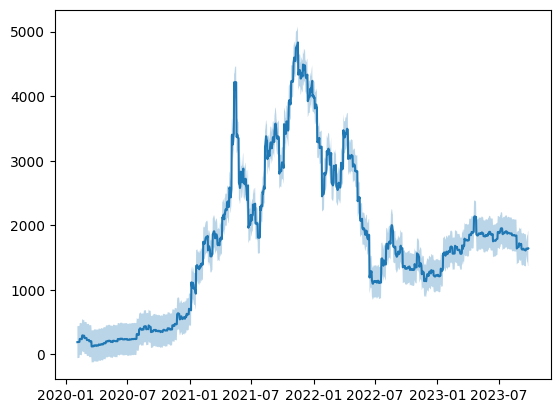

In [18]:
# try add date features/ calendar variables

# 'month', 'day', 'dayofweek', 'weekofyear', 'quarter'
date_features = ['month']

# Make predictions with the best parameters
fcst_df_best = timegpt.forecast(df, h=best_pred_horizon, freq=best_freq, level=level, date_features=date_features, finetune_steps=best_finetune_steps, add_history=True)
fcst_df_best['ds'] = pd.to_datetime(fcst_df_best['ds'])

# Print or use fcst_df_best as needed
print(fcst_df_best)

# Print or use fcst_df_best as needed
merged_df = pd.merge(df, fcst_df, on='ds', how='inner')
mae, mse, rmse, mape, da = calculate_metrics(merged_df)
print(f'Average MAE: {mae}')
print(f'Average MSE: {mse}')
print(f'Average RMSE: {rmse}')
print(f'Average MAPE: {mape:.2f}%')
print(f'Average DA: {da:.2f}%')

import matplotlib.pyplot as plt
plt.plot(fcst_df_best['ds'], fcst_df_best['TimeGPT'])
plt.fill_between(fcst_df_best['ds'], fcst_df_best['TimeGPT-lo-80'], fcst_df_best['TimeGPT-hi-80'], alpha=0.3)

In [19]:
# try add exogeous variables

# introduce BTC daily adj close price as exogeous variable
btc_df=pd.read_csv('/Users/lilypad/Documents/Code/timegpt/20200101_20230919_daily_btc_usd.csv')

# introduce XRP daily adj close price as exogeous variable
xrp_df=pd.read_csv('/Users/lilypad/Documents/Code/timegpt/20200101_20230919_daily_xrp_usd.csv')

# add btc_df adjust close price to df ,join on date
df['btc_adj_close']=btc_df['Adj Close']

# add xrf_df adjust close price to df ,join on date
df['xrp_adj_close']=xrp_df['Adj Close']

df.head()

,ds,Open,High,Low,Close,y,Volume,Price Delta,Daily_Percentage_Change,unique_id,btc_adj_close,xrp_adj_close
1,2020-01-02,130.820038,130.820038,126.954910,127.410179,127.410179,8032709256,-3.391823,-2.593097,ETH,6985.470215,0.188043
2,2020-01-03,127.411263,134.554016,126.490021,134.171707,134.171707,10476845358,6.761528,5.306898,ETH,7344.884277,0.193521
3,2020-01-04,134.168518,136.052719,133.040558,135.069366,135.069366,7430904515,0.897659,0.669038,ETH,7410.656738,0.194355
4,2020-01-05,135.072098,139.410202,135.045624,136.276779,136.276779,7526675353,1.207413,0.893920,ETH,7411.317383,0.195537
5,2020-01-06,136.305542,144.328186,136.079636,144.304153,144.304153,9093747121,8.027374,5.890493,ETH,7769.219238,0.221510


In [20]:
# split train and test data
train_data = df.iloc[:int(df.shape[0]*0.8)]
test_data = df.iloc[int(df.shape[0]*0.8):]
test_data

,ds,Open,High,Low,Close,y,Volume,Price Delta,Daily_Percentage_Change,unique_id,btc_adj_close,xrp_adj_close
1086,2022-12-22,1213.672607,1221.986816,1187.127808,1218.182129,1218.182129,5297471739,4.582153,0.377567,ETH,16830.341797,0.349600
1087,2022-12-23,1218.079346,1226.998779,1215.994873,1220.159424,1220.159424,4835831923,1.977295,0.162315,ETH,16796.953125,0.354273
1088,2022-12-24,1220.117920,1224.911621,1216.338745,1221.148560,1221.148560,2626153345,0.989136,0.081066,ETH,16847.755859,0.352179
1089,2022-12-25,1221.171509,1223.517822,1203.719604,1218.962036,1218.962036,3942720070,-2.186523,-0.179055,ETH,16841.986328,0.346392
1090,2022-12-26,1218.920166,1226.974365,1214.335938,1226.974365,1226.974365,3282098400,8.012329,0.657308,ETH,16919.804688,0.365723
...,...,...,...,...,...,...,...,...,...,...,...,...
1353,2023-09-15,1626.870117,1652.113159,1613.248657,1641.640381,1641.640381,4348584771,14.666016,0.901429,ETH,26608.693359,0.500875
1354,2023-09-16,1641.446411,1649.988647,1632.577881,1635.221680,1635.221680,2819575929,-6.418701,-0.390993,ETH,26568.281250,0.499880
1355,2023-09-17,1635.201050,1635.512939,1616.779297,1622.896729,1622.896729,3032716258,-12.324951,-0.753717,ETH,26534.187500,0.493041
1356,2023-09-18,1623.081909,1669.015381,1609.957397,1637.347046,1637.347046,5916674789,14.450317,0.890403,ETH,26754.281250,0.503203


In [21]:
# add future value of exoguous varaibels for horizon period
exo_future_df= test_data[:7].drop(columns=['y'])
exo_future_df

,ds,Open,High,Low,Close,Volume,Price Delta,Daily_Percentage_Change,unique_id,btc_adj_close,xrp_adj_close
1086,2022-12-22,1213.672607,1221.986816,1187.127808,1218.182129,5297471739,4.582153,0.377567,ETH,16830.341797,0.349600
1087,2022-12-23,1218.079346,1226.998779,1215.994873,1220.159424,4835831923,1.977295,0.162315,ETH,16796.953125,0.354273
1088,2022-12-24,1220.117920,1224.911621,1216.338745,1221.148560,2626153345,0.989136,0.081066,ETH,16847.755859,0.352179
1089,2022-12-25,1221.171509,1223.517822,1203.719604,1218.962036,3942720070,-2.186523,-0.179055,ETH,16841.986328,0.346392
1090,2022-12-26,1218.920166,1226.974365,1214.335938,1226.974365,3282098400,8.012329,0.657308,ETH,16919.804688,0.365723
1091,2022-12-27,1226.987061,1230.418091,1205.895630,1212.791626,4091530737,-14.182739,-1.155912,ETH,16717.173828,0.368126
1092,2022-12-28,1212.736572,1213.128906,1185.702148,1189.986084,4991669631,-22.805542,-1.880417,ETH,16552.572266,0.356531


In [22]:
# predict with added exogeous variables
fcst_df_best = timegpt.forecast(df=train_data, X_df=exo_future_df,h=best_pred_horizon, level=level, finetune_steps=best_finetune_steps)

fcst_df_best['ds'] = pd.to_datetime(fcst_df_best['ds'])

# Print or use fcst_df_best as needed
print(fcst_df_best)

# Print or use fcst_df_best as needed
merged_df = pd.merge(df, fcst_df, on='ds', how='inner')
mae, mse, rmse, mape, da = calculate_metrics(merged_df)
print(f'Average MAE: {mae}')
print(f'Average MSE: {mse}')
print(f'Average RMSE: {rmse}')
print(f'Average MAPE: {mape:.2f}%')
print(f'Average DA: {da:.2f}%')


INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


  unique_id         ds      TimeGPT  TimeGPT-lo-99.5  TimeGPT-lo-90  \
0       ETH 2022-12-22  1218.182129       904.661107    1048.839111   
1       ETH 2022-12-23  1220.159424       671.093703     961.883990   
2       ETH 2022-12-24  1221.148560       519.446345     932.165656   
3       ETH 2022-12-25  1218.962036       613.678813     891.573486   
4       ETH 2022-12-26  1226.974365       499.494020     773.849646   
5       ETH 2022-12-27  1212.791626       541.544693     763.983533   
6       ETH 2022-12-28  1189.986084       212.694644     732.544183   

   TimeGPT-lo-80  TimeGPT-hi-80  TimeGPT-hi-90  TimeGPT-hi-99.5  
0    1097.188867    1339.175391    1387.525146      1531.703151  
1    1025.092383    1415.226465    1478.434857      1769.225145  
2    1011.277209    1431.019910    1510.131464      1922.850775  
3    1005.710657    1432.213416    1546.350586      1824.245259  
4     969.923242    1484.025488    1680.099084      1954.454710  
5     908.367334    1517.215918    